<a href="https://colab.research.google.com/github/cmarcelos/Chatbot_Alura/blob/main/Pdf_Baixar_Imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyPDF2 Pillow ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.4 MB/s eta 0:00:00


In [2]:
from google.colab import output
output.enable_custom_widget_manager()

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving IFMAP160007 CROMOTRICOLOGIA EM EQUINOS.pdf to IFMAP160007 CROMOTRICOLOGIA EM EQUINOS.pdf
User uploaded file "IFMAP160007 CROMOTRICOLOGIA EM EQUINOS.pdf" with length 4628746 bytes


Miniaturas das Imagens:
Imagem 1:


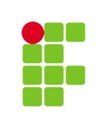

Imagem 2:


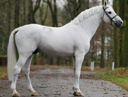

Imagem 3:


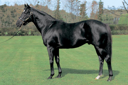

Imagem 4:


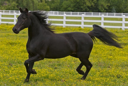

Imagem 5:


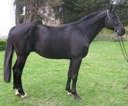

Imagem 6:


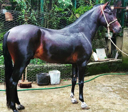

Imagem 7:


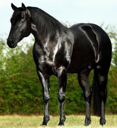

Imagem 8:


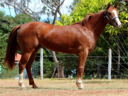

Imagem 9:


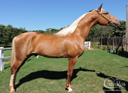

Imagem 10:


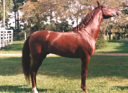

Imagem 11:


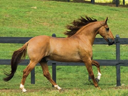

Imagem 12:


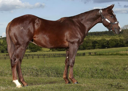

Imagem 13:


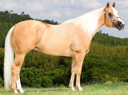

Imagem 14:


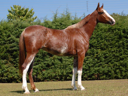

Imagem 15:


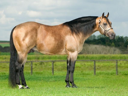

Imagem 16:


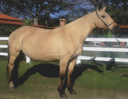

Imagem 17:


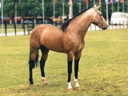

Imagem 18:


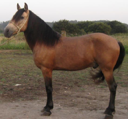

Imagem 19:


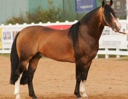

Imagem 20:


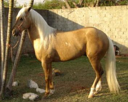

Imagem 21:


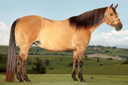

Imagem 22:


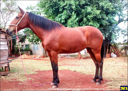

Imagem 23:


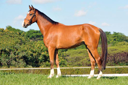

Imagem 24:


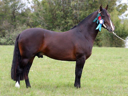

Imagem 25:


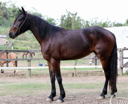

Imagem 26:


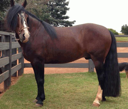

Imagem 27:


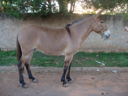

Imagem 28:


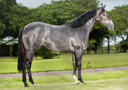

Imagem 29:


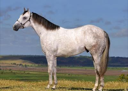

Imagem 30:


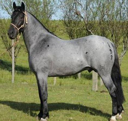

Imagem 31:


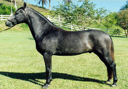

Imagem 32:


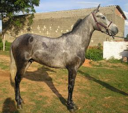

Imagem 33:


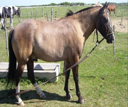

Imagem 34:


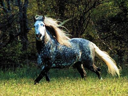

Imagem 35:


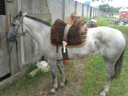

Imagem 36:


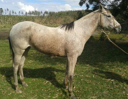

Imagem 37:


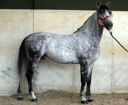

Imagem 38:


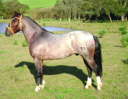

Imagem 39:


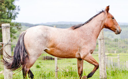

Imagem 40:


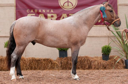

Imagem 41:


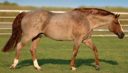

Imagem 42:


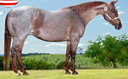

Imagem 43:


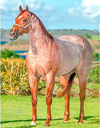

Imagem 44:


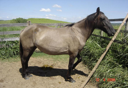

Imagem 45:


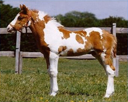

Imagem 46:


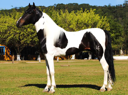

Imagem 47:


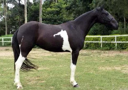

Imagem 48:


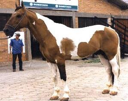

Imagem 49:


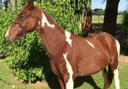

Imagem 50:


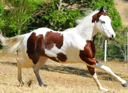

Imagem 51:


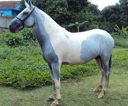

Imagem 52:


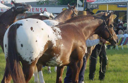

Imagem 53:


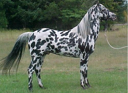

Imagem 54:


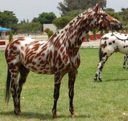

Imagem 55:


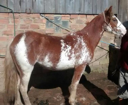

Imagem 56:


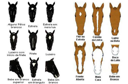

Imagem 57:


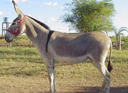

Imagem 58:


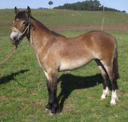

Imagem 59:


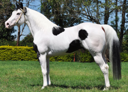

Imagem 60:


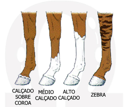

Text(value='', description='Números das imagens (separados por vírgula):')

Button(description='Baixar Selecionadas', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import PyPDF2
from PIL import Image
from google.colab import files
import ipywidgets as widgets
import io # Importe o módulo io aqui

def extract_images(pdf_file_path):
    with open(pdf_file_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        images_data = []

        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            images = page.images
            for image_num, image in enumerate(images):
                image_data = image.data
                image_name = f'image_{page_num}_{image_num}.png'
                image_obj = Image.open(io.BytesIO(image_data))

                # Criar miniatura
                thumbnail_size = (128, 128)
                image_obj.thumbnail(thumbnail_size)
                thumbnail_data = io.BytesIO()
                image_obj.save(thumbnail_data, format="PNG")
                thumbnail_data = thumbnail_data.getvalue()

                images_data.append((image_data, image_name, thumbnail_data))

        # Exibir todas as miniaturas com números
        print("Miniaturas das Imagens:")
        for i, (_, _, thumbnail_data) in enumerate(images_data):
            print(f"Imagem {i+1}:")
            image_obj = Image.open(io.BytesIO(thumbnail_data))
            display(image_obj)

        # Função para baixar a imagem selecionada
        def download_selected(image_numbers_str):
            image_numbers = [int(x.strip()) for x in image_numbers_str.split(",") if x.strip().isdigit()]
            for image_number in image_numbers:
                if 1 <= image_number <= len(images_data):
                    image_data, image_name, _ = images_data[image_number - 1]
                    image_obj = Image.open(io.BytesIO(image_data))
                    image_obj.save(image_name)
                    files.download(image_name)
                else:
                    print(f"Número de imagem inválido: {image_number}")

        # Caixa de entrada para o usuário inserir os números das imagens
        image_numbers_input = widgets.Text(description="Números das imagens (separados por vírgula):")
        download_button = widgets.Button(description="Baixar Selecionadas")
        download_button.on_click(lambda b: download_selected(image_numbers_input.value))

        display(image_numbers_input, download_button)

# Exemplo de uso
extract_images("IFMAP160007 CROMOTRICOLOGIA EM EQUINOS.pdf")

